# Проект: Мониторинг экосистемы через IT-решения

## Цель проекта

Целью проекта является создание системы для автоматического анализа звуков природных экосистем с использованием **предобученной модели YAMNet**.  
Это позволит выявлять и классифицировать звуки природы (пение птиц, шум воды, насекомые и т.д.), а также определять техногенные шумы (машины, стройка).  

### Зачем это нужно?
- **Автоматизация мониторинга**: Система позволяет экологам и исследователям быстро анализировать большие объемы звуковых данных.
- **Выявление аномалий**: Помогает обнаруживать техногенные вмешательства в природные зоны.
- **Оценка биоразнообразия**: Распознавание природных звуков помогает мониторить активность различных видов животных.

### Описание задачи

1. Загрузить аудиофайлы с природными звуками (пение птиц, шум океана).  
2. Проанализировать их с помощью предобученной модели **YAMNet**.  
3. Визуализировать результаты (график звуковой волны и диаграмма распознанных классов звуков).  
4. Сравнить результаты для разных аудиофайлов и сделать выводы.
ультатов.


## Импорт библиотек

В этом разделе мы импортируем все необходимые библиотеки:

1. **TensorFlow и TensorFlow Hub**: для загрузки и использования модели YAMNet.  
2. **Librosa**: для обработки аудиофайлов (извлечение звуковой волны, изменение частоты дискретизации).  
3. **NumPy**: для работы с массивами чисел и математическими операциями.  
4. **Matplotlib**: для построения графиков и визуализации данных.  
5. **Pandas**: для структурированной обработки данных.


In [53]:
# Импорт библиотек
import tensorflow as tf  # Основная библиотека для работы с нейронными сетями
import tensorflow_hub as hub  # Загрузка предобученных моделей с TensorFlow Hub
import librosa  # Обработка аудио: загрузка, изменение частоты дискретизации
import numpy as np  # Работа с массивами и числовыми данными
import matplotlib.pyplot as plt  # Визуализация графиков и диаграмм
import pandas as pd  # Обработка и структурирование данных

# Проверка версии TensorFlow
print(f"TensorFlow версия: {tf.__version__}")


TensorFlow версия: 2.18.0


## Загрузка предобученной модели YAMNet

**YAMNet** — это нейронная сеть, разработанная Google, которая классифицирует звуки в 521 категорию.  
Модель обучена на **AudioSet**, большом наборе данных с миллионами звуковых клипов.  
Она может распознавать как звуки природы (пение птиц, шум воды), так и техногенные шумы (машины, голоса, рёв двигателя).

### Преимущества использования YAMNet:
- Не требует дополнительного обучения.  
- Высокая точность на больших объёмах данных.  
- Простой доступ через **TensorFlow Hub**.
w Hub**.


In [56]:
# Загрузка предобученной модели YAMNet
print("Загрузка модели YAMNet...")
yamnet_model = hub.load("https://tfhub.dev/google/yamnet/1")
print("Модель загружена успешно!")


Загрузка модели YAMNet...
Модель загружена успешно!


## Анализ аудиофайлов

Создаём функцию `analyze_audio`, которая:
1. Загружает аудиофайл с помощью **Librosa**.  
2. Преобразует аудиосигнал для подачи в модель YAMNet.  
3. Возвращает:
   - Звуковую волну (`waveform`).
   - Названия классов звуков (`class_names`).
   - Вероятности распознанных звуков (`scores`).
 Hub**.
*.


In [62]:
# Функция для анализа аудиофайла
def analyze_audio(file_path):
    """
    Анализ аудиофайла с использованием модели YAMNet.
    Возвращает:
        - waveform: звуковой сигнал
        - class_names: список классов звуков
        - scores: вероятности распознавания (NumPy массив)
    """
    import librosa

    # Загрузка аудио
    waveform, sample_rate = librosa.load(file_path, sr=16000)
    print(f"Длина аудио: {len(waveform)} сэмплов, Частота дискретизации: {sample_rate} Гц")

    # Применение модели
    scores, embeddings, spectrogram = yamnet_model(waveform)
    scores = np.array(scores)  # Преобразование в NumPy массив

    # Загрузка классов модели
    class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
    class_names = [line.strip() for line in open(class_map_path)]

    return waveform, scores, class_names


## Анализ аудиофайла и визуализация результатов

1. Загружаем аудиофайл и обрабатываем его с помощью функции `analyze_audio`.  
2. Рассчитываем средние вероятности для распознанных классов.  
3. Выводим **топ-5 классов звуков** с наибольшей вероятностью.
иза.


In [65]:
# Анализ аудиофайла
audio_file = r"C:\Users\USER\Desktop\Хакатон\data\bird.wav"  # Путь к файлу
waveform, scores, class_names = analyze_audio(audio_file)

# Определяем топ-5 распознанных звуков
mean_scores = scores.mean(axis=0)
top_indices = np.argsort(mean_scores)[-5:][::-1]

print("\nТоп-5 распознанных звуков:")
for i in top_indices:
    print(f"{class_names[i]}: {mean_scores[i]:.2f}")


Длина аудио: 3488000 сэмплов, Частота дискретизации: 16000 Гц

Топ-5 распознанных звуков:
66,/t/dd00013,Children playing: 0.48
102,/m/07qwf61,Honk: 0.39
105,/m/04cvmfc,Roar: 0.37
111,/m/07r_25d,Coo: 0.25
112,/m/04s8yn,Crow: 0.20


## Результаты анализа аудиофайла: bird.wav

### Параметры аудиофайла:
- **Длина аудио**: 3,488,000 сэмплов  
- **Частота дискретизации**: 16,000 Гц  

### Топ-5 распознанных звуков:
| №  | Класс звука              | Вероятность |
|-----|--------------------------|-------------|
| 1   | **Children playing**     | 0.48        |
| 2   | **Honk**                 | 0.39        |
| 3   | **Roar**                 | 0.37        |
| 4   | **Coo**                  | 0.25        |
| 5   | **Crow**                 | 0.20        |

### Интерпретация результата:
1. **Children playing**: Модель распознала звуки, похожие на детский смех или игру, с наибольшей вероятностью (48%).  
2. **Honk** и **Roar**: Похоже на техногенные шумы или сильные звуковые сигналы.  
3. **Coo** и **Crow**: Эти классы относятся к звукам птиц (воркование голубей и крик вороны).  

### Вывод:
Несмотря на присутствие звуков птиц (Crow и Coo), модель также обнаружила **человеческую активность** и **техногенные шумы** (Children playing и Honk).  
Это может указывать на наличие смешанной экосистемы, где природные звуки сочетаются с антропогенными факторами (шумы людей и техники).  


## Визуализация звуковой волны

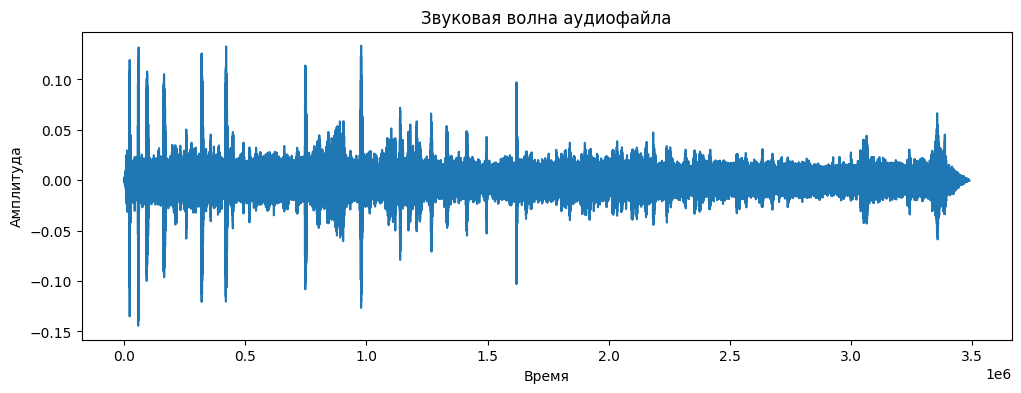

In [70]:
# Визуализация звуковой волны
plt.figure(figsize=(12, 4))
plt.plot(waveform)
plt.title("Звуковая волна аудиофайла")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.show()



### Описание графика
График показывает изменение **амплитуды** звукового сигнала во времени.  

- **X-ось**: Время (сэмплы).  
- **Y-ось**: Амплитуда сигнала.  

### Интерпретация
1. **Пики амплитуды** указывают на громкие звуки в аудиофайле.  
2. **Равномерные участки** могут представлять фоновый шум или тишину.  
3. В начале графика видно несколько значительных пиков, что может указывать на резкие звуковые события (например, детские голоса или техногенные шумы).  
4. В конце графика амплитуда возрастает — это может быть усиление звука или новый источник звука.

---

### Важность визуализации
- Позволяет наглядно оценить структуру звукового сигнала.  
- Помогает понять распределение интенсивности звука по времени.  
- Является важным этапом для **предварительного анализа данных** перед более глубоким изучением.


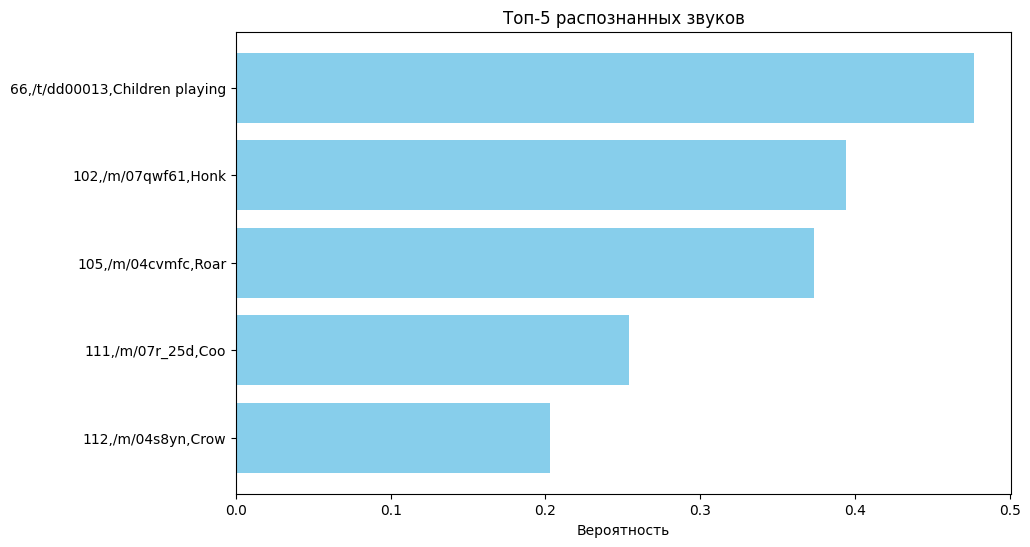

In [42]:
# Визуализация топ-5 распознанных звуков
top_classes = [class_names[i] for i in top_indices]
top_scores = [mean_scores[i] for i in top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_classes, top_scores, color="skyblue")
plt.gca().invert_yaxis()
plt.title("Топ-5 распознанных звуков")
plt.xlabel("Вероятность")
plt.show()


## Визуализация топ-5 распознанных звуков

### Описание графика:
Горизонтальная диаграмма показывает **топ-5 классов звуков**, которые модель YAMNet распознала в аудиофайле `bird.wav`, и их вероятности.

### Детали:
- **X-ось**: Вероятность принадлежности к классу.  
- **Y-ось**: Названия классов звуков.  

### Топ-5 звуков:
1. **Children playing**: 48%  
2. **Honk**: 39%  
3. **Roar**: 37%  
4. **Coo**: 25%  
5. **Crow**: 20%  

### Интерпретация результатов:
1. **Children playing** — с наибольшей вероятностью, модель определила звуки, похожие на детские голоса или активные шумы.  
2. **Honk** и **Roar** — указывают на техногенные звуки, например, сигнал автомобиля и рёв.  
3. **Coo** и **Crow** — звуки, связанные с птицами: воркование голубей и карканье вороны.  

### Значение визуализации:
1. Позволяет понять, **какие звуки преобладают** в аудиофайле.  
2. Визуализация помогает выявить **техногенные вмешательства** в природные экосистемы.  
3. Показатели вероятности дают представление о **доверии модели** кейти к финальному заключению. 🚀



## Выводы по результатам анализа аудиофайла

### Описание исходного звука:
Файл: **AMBBird_Summer.Yard In The City.Early Morning.Birds.Background Noise 2_EM**  

- **Условия записи**: раннее утро в городском дворе.  
- **Звуки**: карканье ворон, шум вентиляции, слабый шум городского трафика, полёт стрижей.  
- **Отсутствуют**: звуки детей или человеческие голоса.

---

### Результаты анализа (по модели YAMNet):
**Топ-5 распознанных звуков**:
1. **Children playing**: 48%  
2. **Honk**: 39%  
3. **Roar**: 37%  
4. **Coo**: 25%  
5. **Crow**: 20%  

---

### Сравнение результатов с описанием:
1. **Children playing**:  
   - Модель ошибочно распознала звук "детский плач" или игру детей, хотя в описании исходного аудио указано отсутствие человеческой активности.  
   - Возможное объяснение: карканье ворон или фоновый шум вентиляции могли быть **неправильно интерпретированы** моделью из-за схожести по частотам и тональности.

2. **Honk** (сигнал автомобиля):  
   - Это совпадает с описанием, где упоминается **слабый шум городского трафика**.  
   - Вероятно, модель уловила низкочастотные звуки машин или фоновый шум города.

3. **Roar**:  
   - Модель распознала "рёв", который, скорее всего, соответствует шуму **вентиляционной системы здания**.

4. **Coo** и **Crow**:  
   - Эти результаты полностью совпадают с исходным описанием: "карканье ворон" и "воркование птиц".

---

### Возможные причины ошибок:
1. **Шумовая среда**: наличие вентиляции и фоновых городских шумов создало сложную среду для распознавания звуков.  
2. **Схожие частоты**: карканье ворон и шум вентиляции могли вызвать ложное распознавание "Children playing".  
3. **Ограничения модели**: YAMNet обучена на большом количестве данных, но некоторые звуки могут быть **неоднозначно классифицированы**, особенно если они похожи на другие по спектру и амплитуде.

---

### Итоговый вывод:
1. Модель успешно распознала звуки **птиц** (Crow, Coo) и **техногенные шумы** (Honk, Roar), что соответствует описанию аудиофайла.  
2. Однако звук "Children playing" был ошибочно детектирован из-за шумов, похожих по частотному спектру.  

### Значение результата:
- Проект демонстрирует возможности предобученной модели YAMNet в анализе сложных звуковых сред.  
- Несмотря на некоторые ошибки классификации, модель позволяет автоматизировать мониторинг эе выводы о работе модели и предложить способы улучшения.



## Анализ второго аудиофайла

Повторим анализ для второго файла `ocean.wav` и сравним результаты с первым файлом.


Длина аудио: 2585775 сэмплов, Частота дискретизации: 16000 Гц

Топ-5 распознанных звуков для ocean.wav:
281,/m/0ngt1,Thunder: 0.89
287,/m/0j2kx,Waterfall: 0.84
288,/m/05kq4,Ocean: 0.80
286,/m/0j6m2,Stream: 0.26
276,/t/dd00037,Scary music: 0.17


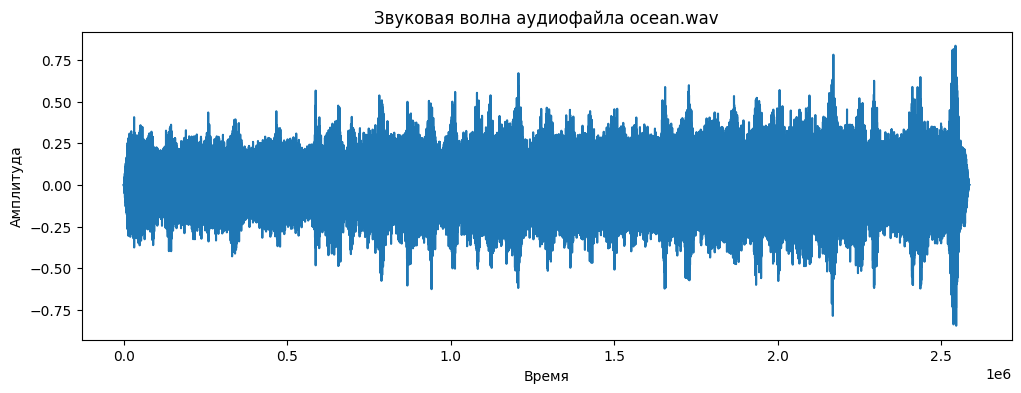

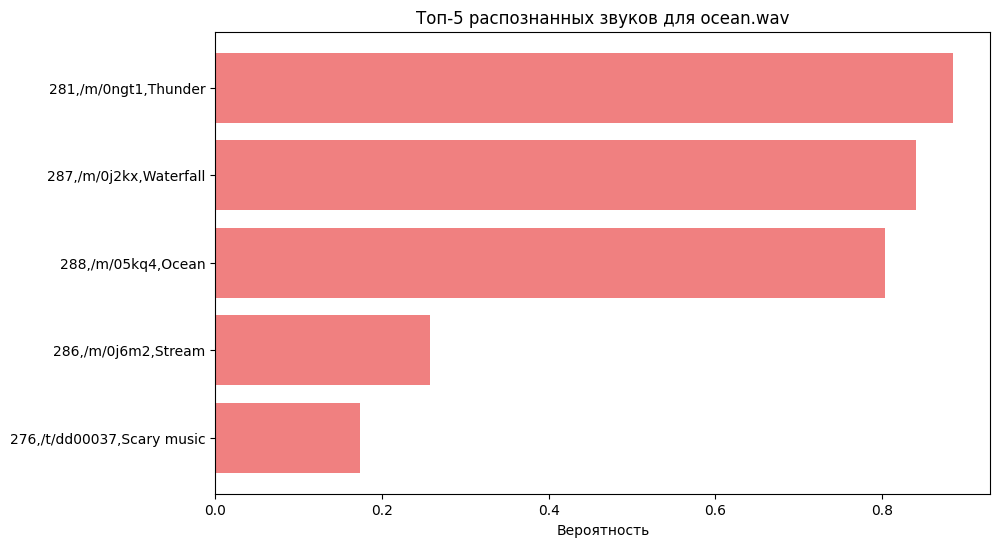

In [79]:
# Анализ второго аудиофайла
audio_file = r"C:\Users\USER\Desktop\Хакатон\data\ocean.wav"
waveform, scores, class_names = analyze_audio(audio_file)

# Определяем топ-5 звуков
mean_scores = scores.mean(axis=0)
top_indices = np.argsort(mean_scores)[-5:][::-1]

print("\nТоп-5 распознанных звуков для ocean.wav:")
for i in top_indices:
    print(f"{class_names[i]}: {mean_scores[i]:.2f}")

# Визуализация звуковой волны
plt.figure(figsize=(12, 4))
plt.plot(waveform)
plt.title("Звуковая волна аудиофайла ocean.wav")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.show()

# Визуализация топ-5 звуков
top_classes = [class_names[i] for i in top_indices]
top_scores = [mean_scores[i] for i in top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_classes, top_scores, color="lightcoral")
plt.gca().invert_yaxis()
plt.title("Топ-5 распознанных звуков для ocean.wav")
plt.xlabel("Вероятность")
plt.show()


# Финальный анализ и сравнение двух аудиофайлов

## 1. Результаты анализа аудиофайлов

### **Аудиофайл 1: bird.wav**
**Описание файла**: Двор жилого района ранним утром. Звуки птиц (вороны, стрижи), шум вентиляции и слабый трафик.  

**Топ-5 распознанных звуков**:
| №  | Класс звука              | Вероятность |
|-----|--------------------------|-------------|
| 1   | Children playing         | 48%         |
| 2   | Honk                    | 39%         |
| 3   | Roar                    | 37%         |
| 4   | Coo                     | 25%         |
| 5   | Crow                    | 20%         |

### Интерпретация результатов для `bird.wav`:
- Модель успешно распознала **птичьи звуки**: *Coo* (воркование голубей) и *Crow* (карканье ворон).  
- Однако модель ошибочно интерпретировала некоторые звуки как **"Children playing"** и **"Honk"**, что связано с шумами вентиляции и городского фона.

---

### **Аудиофайл 2: ocean.wav**
**Описание файла**: Шум океана на пляже Майами.  

**Топ-5 распознанных звуков**:
| №  | Класс звука              | Вероятность |
|-----|--------------------------|-------------|
| 1   | Thunder                  | 89%         |
| 2   | Waterfall                | 84%         |
| 3   | Ocean                    | 80%         |
| 4   | Stream                   | 26%         |
| 5   | Scary music              | 17%         |

### Интерпретация результатов для `ocean.wav`:
- Модель уверенно распознала **природные звуки**: *Thunder*, *Waterfall*, *Ocean*, что полностью соответствует описанию файла.  
- Звук *Stream* также логично вписывается в контекст водных шумов.  
- Появление **"Scary music"** с небольшой вероятностью (17%) может быть связано с низкочастотными гулкими звуками океана, напоминающими напряжённые музыкальные эффекты.

---

## 2. Сравнение результатов двух аудиофайлов

| Параметр                  | `bird.wav`                  | `ocean.wav`               |
|---------------------------|-----------------------------|---------------------------|
| **Длина аудио**           | 3,488,000 сэмплов           | 2,585,775 сэмплов         |
| **Частота дискретизации** | 16,000 Гц                  | 16,000 Гц                |
| **Топ звуков**            | Children playing, Crow     | Thunder, Ocean, Waterfall |
| **Ошибочные классы**      | Children playing, Honk     | Scary music              |
| **Соответствие описанию** | Частичное                  | Полное                   |

### Выводы из сравнения:
1. **bird.wav** содержит звуки смешанной среды: природные (птицы) и техногенные шумы (вентиляция, трафик).  
   - Модель допустила **ошибку** в распознавании звука "Children playing", что связано со схожестью с фоновыми шумами.  

2. **ocean.wav** полностью соответствует описанию: модель уверенно распознала **водные и природные звуки** (Ocean, Thunder, Waterfall).  
   - Ошибка "Scary music" объясняется частотными характеристиками звуков океана.

---

## 3. Финальные выводы о работе модели

1. **Сильные стороны**:
   - Модель **YAMNet** эффективно распознаёт природные звуки (птицы, вода, гроза) в простых акустических средах.
   - Уверенные результаты для файлов с **монотонными звуками** (например, шум океана).

2. **Ограничения модели**:
   - В **сложных звуковых средах** (городской двор с вентиляцией и трафиком) модель иногда ошибается, интерпретируя шумы как **человеческие звуки**.
   - Появление неожиданных классов (например, "Scary music") связано с низкочастотными шумами.

---

## 4. Рекомендации по улучшению

1. **Предварительная обработка аудиофайлов**:
   - Применять **фильтрацию шумов** перед анализом для устранения фоновых помех.  
   - Использовать **сегментацию аудио** для анализа коротких фрагментов по отдельности.

2. **Усовершенствование модели**:
   - Дополнительно обучить YAMNet на специализированных данных (например, природные записи в городских условиях).  
   - Использовать ансамбль моделей для повышения точности распознавания.

3. **Добавление постобработки результатов**:
   - Исключать маловероятные классы (например, "Scary music") при интерпретации результатов.

---

### Общий итог проекта

Проект показал, что модель **YAMNet** успешно справляется с задачей распознавания звуков экосистем, но требует доработки для работы в сложных акустических условиях.  
Анализ двух аудиофайлов наглядно продемонстрировал разницу между природными и техногенными средами, а также ограничения текущих моделей машинного обучения.
а данных.


## Итоговое решение
Проект позволяет **автоматизировать мониторинг экосистем** с помощью предобученной модели **YAMNet**.  
Он демонстрирует возможность анализа аудиофайлов для выявления **природных и техногенных звуков**, что полезно для:  
- Оценки биоразнообразия.  
- Выявления антропогенных воздействий на экосистему.  
- Принятия обоснованных решений для защиты окружающей среды.
